# Web Scraping using Python

### Web Scraping using Beautiful Soup

import needed packages

In [85]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

web scraping data from website

In [86]:
url = ("https://h1bdata.info/index.php?em=&job=data+scientist&city=&year=2019")
page = requests.get(url)

header: imitate browsers, used to communicate website

In [87]:
headers= {'User-Agent':'Mozilla/5.0'}

In [88]:
response= requests.get(url, headers= headers)

make sure downloaded whole HTML content

In [89]:
response.status_code

200

In [90]:
soup = BeautifulSoup(response.content,"html.parser")

In [91]:
stat_table= soup.find_all('table',class_='tablesorter')

In [92]:
len(stat_table) #we find the one table we need 

1

In [93]:
type(stat_table)

bs4.element.ResultSet

In [94]:
stat_table= stat_table[0]

In [95]:
type(stat_table)

bs4.element.Tag

look through all the rows

In [96]:
for row in stat_table.find_all('tr'):
    for head in row.find_all('th'):
        print (head.text)

EMPLOYER
JOB TITLE
BASE SALARY
LOCATION
SUBMIT DATE
START DATE
CASE STATUS


In [97]:
for row in stat_table.find_all('tr'):
    for cell in row.find_all('td'):
        print (cell.text)

OPEN DATA GROUP INC
DATA SCIENTIST
51,860
CHICAGO, ILLINOIS
02/28/2019
08/21/2019
CERTIFIED
BLINKAI TECHNOLOGIES INC
DATA SCIENTIST
59,340
BOSTON, MASSACHUSETTS
03/12/2019
09/06/2019
CERTIFIED
DSFEDERAL INC
DATA SCIENTIST
60,420
ROCKVILLE, MARYLAND
03/05/2019
09/04/2019
WITHDRAWN
DSFEDERAL INC
DATA SCIENTIST
60,420
ROCKVILLE, MARYLAND
03/08/2019
09/04/2019
CERTIFIED
CYBERXDATA LLC
DATA SCIENTIST
62,000
NEWTON, MASSACHUSETTS
03/20/2019
09/19/2019
CERTIFIED
ADECCO GROUP NA/MODIS INC
DATA SCIENTIST
65,500
DEARBORN, MICHIGAN
03/19/2019
09/16/2019
CERTIFIED
PIPER COMPANIES LLC
DATA SCIENTIST
66,000
MCLEAN, VIRGINIA
03/21/2019
09/18/2019
CERTIFIED
BELCAN ENGINEERING GROUP LLC
DATA SCIENTIST
66,000
CHAMPAIGN, ILLINOIS
03/13/2019
09/09/2019
CERTIFIED
KELLY SERVICES INC
DATA SCIENTIST
66,400
CEDAR FALLS, IOWA
03/07/2019
09/03/2019
CERTIFIED
JACKPOCKET INC
DATA SCIENTIST
67,000
NEW YORK, NEW YORK
02/13/2019
07/01/2019
CERTIFIED
TEKSYSTEMS INC
DATA SCIENTIST
70,000
DEARBORN, MICHIGAN
03/12/2019
0

In [98]:
import re

list_rows = []
for row in stat_table.find_all('tr'):
    cell = row.find_all('td')
    str_cell = str(cell)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cell))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[STITCH FIX INC, DATA SCIENTIST, 260,000, SAN FRANCISCO, CALIFORNIA, 05/24/2019, 06/07/2019, CERTIFIED]


str

### Data Manipulation and Cleaning

In [99]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[OPEN DATA GROUP INC, DATA SCIENTIST, 51,860, ..."
2,"[BLINKAI TECHNOLOGIES INC, DATA SCIENTIST, 59,..."
3,"[DSFEDERAL INC, DATA SCIENTIST, 60,420, ROCKVI..."
4,"[DSFEDERAL INC, DATA SCIENTIST, 60,420, ROCKVI..."
5,"[CYBERXDATA LLC, DATA SCIENTIST, 62,000, NEWTO..."
6,"[ADECCO GROUP NA/MODIS INC, DATA SCIENTIST, 65..."
7,"[PIPER COMPANIES LLC, DATA SCIENTIST, 66,000, ..."
8,"[BELCAN ENGINEERING GROUP LLC, DATA SCIENTIST,..."
9,"[KELLY SERVICES INC, DATA SCIENTIST, 66,400, C..."


Data Manipulation and Cleaning

The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position. This is accomplished by using the str.split() method.

In [100]:
df1 = df[0].str.split(', ', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7
0,[],None,None,None,None,None,None,None
1,[OPEN DATA GROUP INC,DATA SCIENTIST,"51,860",CHICAGO,ILLINOIS,02/28/2019,08/21/2019,CERTIFIED]
2,[BLINKAI TECHNOLOGIES INC,DATA SCIENTIST,"59,340",BOSTON,MASSACHUSETTS,03/12/2019,09/06/2019,CERTIFIED]
3,[DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE,MARYLAND,03/05/2019,09/04/2019,WITHDRAWN]
4,[DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE,MARYLAND,03/08/2019,09/04/2019,CERTIFIED]
5,[CYBERXDATA LLC,DATA SCIENTIST,"62,000",NEWTON,MASSACHUSETTS,03/20/2019,09/19/2019,CERTIFIED]
6,[ADECCO GROUP NA/MODIS INC,DATA SCIENTIST,"65,500",DEARBORN,MICHIGAN,03/19/2019,09/16/2019,CERTIFIED]
7,[PIPER COMPANIES LLC,DATA SCIENTIST,"66,000",MCLEAN,VIRGINIA,03/21/2019,09/18/2019,CERTIFIED]
8,[BELCAN ENGINEERING GROUP LLC,DATA SCIENTIST,"66,000",CHAMPAIGN,ILLINOIS,03/13/2019,09/09/2019,CERTIFIED]
9,[KELLY SERVICES INC,DATA SCIENTIST,"66,400",CEDAR FALLS,IOWA,03/07/2019,09/03/2019,CERTIFIED]


use the strip() method to remove the opening square bracket on column "0."

combine location of column 3 and 4

In [101]:
df1[3]=df1[3]+" "+df1[4]
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7
0,],None,None,NaN,None,None,None,None
1,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860",CHICAGO ILLINOIS,ILLINOIS,02/28/2019,08/21/2019,CERTIFIED]
2,BLINKAI TECHNOLOGIES INC,DATA SCIENTIST,"59,340",BOSTON MASSACHUSETTS,MASSACHUSETTS,03/12/2019,09/06/2019,CERTIFIED]
3,DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE MARYLAND,MARYLAND,03/05/2019,09/04/2019,WITHDRAWN]
4,DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE MARYLAND,MARYLAND,03/08/2019,09/04/2019,CERTIFIED]
5,CYBERXDATA LLC,DATA SCIENTIST,"62,000",NEWTON MASSACHUSETTS,MASSACHUSETTS,03/20/2019,09/19/2019,CERTIFIED]
6,ADECCO GROUP NA/MODIS INC,DATA SCIENTIST,"65,500",DEARBORN MICHIGAN,MICHIGAN,03/19/2019,09/16/2019,CERTIFIED]
7,PIPER COMPANIES LLC,DATA SCIENTIST,"66,000",MCLEAN VIRGINIA,VIRGINIA,03/21/2019,09/18/2019,CERTIFIED]
8,BELCAN ENGINEERING GROUP LLC,DATA SCIENTIST,"66,000",CHAMPAIGN ILLINOIS,ILLINOIS,03/13/2019,09/09/2019,CERTIFIED]
9,KELLY SERVICES INC,DATA SCIENTIST,"66,400",CEDAR FALLS IOWA,IOWA,03/07/2019,09/03/2019,CERTIFIED]


drop column 4 and add the header to the dataframe

In [102]:
b = ['Employer','Job title','Base Salary','Location', 'Submit Date', 'Start Date', 'Case Status']

In [103]:
df2=df1.drop(df1.columns[4], axis=1)
df2.columns = b
df2.head(10)

,Employer,Job title,Base Salary,Location,Submit Date,Start Date,Case Status
0,],None,None,NaN,None,None,None
1,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860",CHICAGO ILLINOIS,02/28/2019,08/21/2019,CERTIFIED]
2,BLINKAI TECHNOLOGIES INC,DATA SCIENTIST,"59,340",BOSTON MASSACHUSETTS,03/12/2019,09/06/2019,CERTIFIED]
3,DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE MARYLAND,03/05/2019,09/04/2019,WITHDRAWN]
4,DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE MARYLAND,03/08/2019,09/04/2019,CERTIFIED]
5,CYBERXDATA LLC,DATA SCIENTIST,"62,000",NEWTON MASSACHUSETTS,03/20/2019,09/19/2019,CERTIFIED]
6,ADECCO GROUP NA/MODIS INC,DATA SCIENTIST,"65,500",DEARBORN MICHIGAN,03/19/2019,09/16/2019,CERTIFIED]
7,PIPER COMPANIES LLC,DATA SCIENTIST,"66,000",MCLEAN VIRGINIA,03/21/2019,09/18/2019,CERTIFIED]
8,BELCAN ENGINEERING GROUP LLC,DATA SCIENTIST,"66,000",CHAMPAIGN ILLINOIS,03/13/2019,09/09/2019,CERTIFIED]
9,KELLY SERVICES INC,DATA SCIENTIST,"66,400",CEDAR FALLS IOWA,03/07/2019,09/03/2019,CERTIFIED]


In [104]:
df2.drop(df2.index[2])
df2.head(10)

,Employer,Job title,Base Salary,Location,Submit Date,Start Date,Case Status
0,],None,None,NaN,None,None,None
1,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860",CHICAGO ILLINOIS,02/28/2019,08/21/2019,CERTIFIED]
2,BLINKAI TECHNOLOGIES INC,DATA SCIENTIST,"59,340",BOSTON MASSACHUSETTS,03/12/2019,09/06/2019,CERTIFIED]
3,DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE MARYLAND,03/05/2019,09/04/2019,WITHDRAWN]
4,DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE MARYLAND,03/08/2019,09/04/2019,CERTIFIED]
5,CYBERXDATA LLC,DATA SCIENTIST,"62,000",NEWTON MASSACHUSETTS,03/20/2019,09/19/2019,CERTIFIED]
6,ADECCO GROUP NA/MODIS INC,DATA SCIENTIST,"65,500",DEARBORN MICHIGAN,03/19/2019,09/16/2019,CERTIFIED]
7,PIPER COMPANIES LLC,DATA SCIENTIST,"66,000",MCLEAN VIRGINIA,03/21/2019,09/18/2019,CERTIFIED]
8,BELCAN ENGINEERING GROUP LLC,DATA SCIENTIST,"66,000",CHAMPAIGN ILLINOIS,03/13/2019,09/09/2019,CERTIFIED]
9,KELLY SERVICES INC,DATA SCIENTIST,"66,400",CEDAR FALLS IOWA,03/07/2019,09/03/2019,CERTIFIED]


originally, I used the find_all('th') method to get the table headers. but pd.concat will create mismatch in dataframes

At this point, the table is almost properly formatted. For analysis, we can start by getting an overview of the data as shown below.

In [105]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 7 columns):
Employer       2104 non-null object
Job title      2103 non-null object
Base Salary    2103 non-null object
Location       2103 non-null object
Submit Date    2103 non-null object
Start Date     2103 non-null object
Case Status    2103 non-null object
dtypes: object(7)
memory usage: 115.1+ KB


(2104, 7)

drop the 0 row with missing values, and remove the closing bracket for cells in the "Case Status" column

In [106]:
df3 = df2.drop(df2.index[0])
df3['Case Status'] = df3['Case Status'].str.strip(']')
df3.head(10)

,Employer,Job title,Base Salary,Location,Submit Date,Start Date,Case Status
1,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860",CHICAGO ILLINOIS,02/28/2019,08/21/2019,CERTIFIED
2,BLINKAI TECHNOLOGIES INC,DATA SCIENTIST,"59,340",BOSTON MASSACHUSETTS,03/12/2019,09/06/2019,CERTIFIED
3,DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE MARYLAND,03/05/2019,09/04/2019,WITHDRAWN
4,DSFEDERAL INC,DATA SCIENTIST,"60,420",ROCKVILLE MARYLAND,03/08/2019,09/04/2019,CERTIFIED
5,CYBERXDATA LLC,DATA SCIENTIST,"62,000",NEWTON MASSACHUSETTS,03/20/2019,09/19/2019,CERTIFIED
6,ADECCO GROUP NA/MODIS INC,DATA SCIENTIST,"65,500",DEARBORN MICHIGAN,03/19/2019,09/16/2019,CERTIFIED
7,PIPER COMPANIES LLC,DATA SCIENTIST,"66,000",MCLEAN VIRGINIA,03/21/2019,09/18/2019,CERTIFIED
8,BELCAN ENGINEERING GROUP LLC,DATA SCIENTIST,"66,000",CHAMPAIGN ILLINOIS,03/13/2019,09/09/2019,CERTIFIED
9,KELLY SERVICES INC,DATA SCIENTIST,"66,400",CEDAR FALLS IOWA,03/07/2019,09/03/2019,CERTIFIED
10,JACKPOCKET INC,DATA SCIENTIST,"67,000",NEW YORK NEW YORK,02/13/2019,07/01/2019,CERTIFIED


## Data Analysis and Visualization

The first question: what is the average salary of data scientists?

In [107]:
df3['Base Salary'] = df3['Base Salary'].str.replace(',', '').astype(float)
df3['Base Salary'].describe()

count      2103.000000
mean     106433.964337
std       28952.477938
min       40000.000000
25%       85000.000000
50%      100008.000000
75%      125000.000000
max      260000.000000
Name: Base Salary, dtype: float64

we could find out that the average salary of data scientist is 106,433 dollars

A boxplot is another useful tool to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers). 

([<matplotlib.axis.XTick at 0x1f361e9fb00>],
 <a list of 1 Text xticklabel objects>)

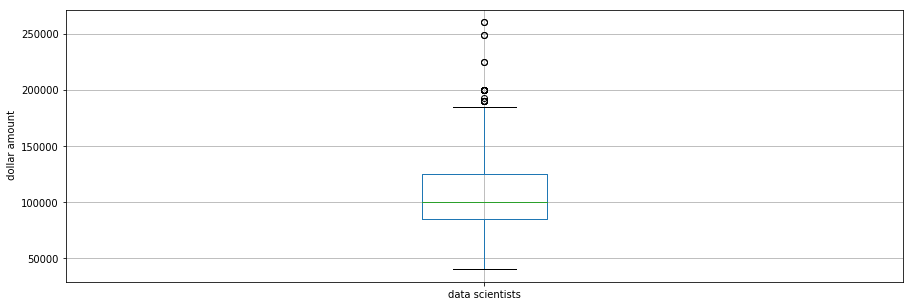

In [108]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
df3.boxplot(column='Base Salary')
plt.grid(True, axis='y')
plt.ylabel(' dollar amount')
plt.xticks([1], ['data scientists'])

the second question: Did data scientists's salary 'follow a normal distribution'?

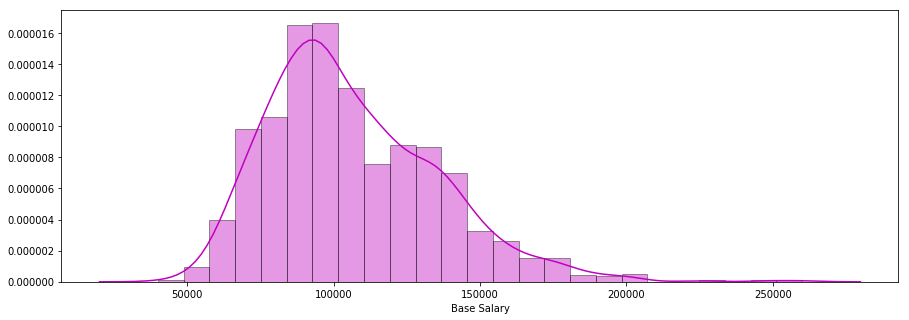

In [109]:
x = df3['Base Salary']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()